In [354]:
import pandas as pd
import numpy as np 
import pickle
import os

In [379]:
path = r'C:\Users\hgera\OneDrive\Escritorio\GITHUB\Air-Quality-Mex\data\data_PowerBI.pkl'
path = path.replace('\\', os.sep)

with open(path, 'rb') as f:
    data= pickle.load(f)

data

,Fecha,Parametro,Concentraciones horarias,Unidad,Contaminante,Estación,Latitud,Longitud
0,2023-01-01 00:00:00,SO2,0.003,ppm,Dioxido_azufre,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.1760
1,2023-01-01 01:00:00,SO2,0.003,ppm,Dioxido_azufre,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.1760
2,2023-01-01 02:00:00,SO2,0.003,ppm,Dioxido_azufre,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.1760
3,2023-01-01 03:00:00,SO2,0.003,ppm,Dioxido_azufre,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.1760
4,2023-01-01 04:00:00,SO2,0.002,ppm,Dioxido_azufre,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.1760
...,...,...,...,...,...,...,...,...
229527,2025-01-01 19:00:00,PM2.5,11.000,µg/m³,PM25,"NL, Universidad",25.7216,-100.3124
229528,2025-01-01 20:00:00,PM2.5,6.000,µg/m³,PM25,"NL, Universidad",25.7216,-100.3124
229529,2025-01-01 21:00:00,PM2.5,8.000,µg/m³,PM25,"NL, Universidad",25.7216,-100.3124
229530,2025-01-01 22:00:00,PM2.5,7.000,µg/m³,PM25,"NL, Universidad",25.7216,-100.3124


In [380]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229532 entries, 0 to 229531
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Fecha                     229532 non-null  datetime64[ns]
 1   Parametro                 229532 non-null  object        
 2   Concentraciones horarias  229532 non-null  float64       
 3   Unidad                    229532 non-null  object        
 4   Contaminante              229532 non-null  object        
 5   Estación                  229532 non-null  object        
 6   Latitud                   229532 non-null  float64       
 7   Longitud                  229532 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 14.0+ MB


### Ahora ya se tienen los datos en una forma comprensible para Power BI, ahora obtengamos los insights i.e los umbrales por día de acuerdo al indice de calidad del aire y riesgo de salud.

### Primero para particulas suspendidas se tiene que el reporte diario es en base al promedio en 24hr
##### En esta figura se muestra con respecto al promedio movil, pero esta es una metrica para proporcionar resultados el tiempo real que intenta aproximarse al promedio en 24hr, si ya se cuenta con una cantidad de datos pasados, se usa el promedio por día



[DOF - Nota del 27/10/2021](https://www.dof.gob.mx/nota_detalle.php?codigo=5633855&fecha=27/10/2021#gsc.tab=0)

[Diario Oficial - 25/01/2024](https://sedema.cdmx.gob.mx/storage/app/uploads/public/65b/28b/0ce/65b28b0cea8c4291991117.pdf)


<div style="text-align: center;">
    <img src="docs/images/umbrales_PM.png" alt="Umbrales de PM2.5" width="500">
</div>


#### Hagamos primero el análisis para PM2.5

In [382]:
dataPM25 = data.copy()
filtro = dataPM25['Parametro'].str.contains('PM10', na=False)
dataPM = dataPM25[filtro]

In [384]:
dataPM

,Fecha,Parametro,Concentraciones horarias,Unidad,Contaminante,Estación,Latitud,Longitud
157336,2023-01-01 00:00:00,PM10,55.0,µg/m³,PM10,"CDMX, UAMI",19.3273,-99.0821
157337,2023-01-01 01:00:00,PM10,64.0,µg/m³,PM10,"CDMX, UAMI",19.3273,-99.0821
157338,2023-01-01 02:00:00,PM10,86.0,µg/m³,PM10,"CDMX, UAMI",19.3273,-99.0821
157339,2023-01-01 03:00:00,PM10,0.0,µg/m³,PM10,"CDMX, UAMI",19.3273,-99.0821
157340,2023-01-01 04:00:00,PM10,0.0,µg/m³,PM10,"CDMX, UAMI",19.3273,-99.0821
...,...,...,...,...,...,...,...,...
190196,2025-01-01 19:00:00,PM10,41.0,µg/m³,PM10,"NL, Universidad",25.7216,-100.3124
190197,2025-01-01 20:00:00,PM10,42.0,µg/m³,PM10,"NL, Universidad",25.7216,-100.3124
190198,2025-01-01 21:00:00,PM10,32.0,µg/m³,PM10,"NL, Universidad",25.7216,-100.3124
190199,2025-01-01 22:00:00,PM10,39.0,µg/m³,PM10,"NL, Universidad",25.7216,-100.3124


In [359]:
# Crear una nueva columna con solo la fecha (sin horas)
dataPM['Fecha_Dia'] = dataPM['Fecha'].dt.date
dataPM['Fecha_Dia'] = pd.to_datetime(dataPM['Fecha_Dia'])
_ = dataPM.query('Fecha_Dia == "2023-01-02" and Estación == "CDMX, Centro de Ciencias Atmosféricas"')
_.head(30)  



C:\Users\hgera\AppData\Local\Temp\ipykernel_5728\1768394618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPM['Fecha_Dia'] = dataPM['Fecha'].dt.date
C:\Users\hgera\AppData\Local\Temp\ipykernel_5728\1768394618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPM['Fecha_Dia'] = pd.to_datetime(dataPM['Fecha_Dia'])
C:\Users\hgera\AppData\Local\Temp\ipykernel_5728\1768394618.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a

,Fecha,Parametro,Concentraciones horarias,Unidad,Contaminante,Estación,Latitud,Longitud,Fecha_Dia
190225,2023-01-02 00:00:00,PM2.5,11.0,µg/m³,PM25,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.176,2023-01-02
190226,2023-01-02 01:00:00,PM2.5,0.0,µg/m³,PM25,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.176,2023-01-02
190227,2023-01-02 02:00:00,PM2.5,8.0,µg/m³,PM25,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.176,2023-01-02
190228,2023-01-02 03:00:00,PM2.5,12.0,µg/m³,PM25,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.176,2023-01-02
190229,2023-01-02 04:00:00,PM2.5,12.0,µg/m³,PM25,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.176,2023-01-02
190230,2023-01-02 05:00:00,PM2.5,8.0,µg/m³,PM25,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.176,2023-01-02
190231,2023-01-02 06:00:00,PM2.5,8.0,µg/m³,PM25,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.176,2023-01-02
190232,2023-01-02 07:00:00,PM2.5,3.0,µg/m³,PM25,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.176,2023-01-02
190233,2023-01-02 08:00:00,PM2.5,7.0,µg/m³,PM25,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.176,2023-01-02
190234,2023-01-02 09:00:00,PM2.5,7.0,µg/m³,PM25,"CDMX, Centro de Ciencias Atmosféricas",19.3266,-99.176,2023-01-02


In [360]:
# Agrupar por 'Fecha_Dia' y 'Estación', luego contar los valores de 'Concentraciones Horarias' que no sean cero
conteo_horas = dataPM.groupby(['Fecha_Dia', 'Estación'])['Concentraciones horarias'].apply(lambda x: (x != 0).sum())
conteo_horas


Fecha_Dia   Estación                             
2023-01-01  CDMX, Centro de Ciencias Atmosféricas    14
            CDMX, UAMI                               11
2023-01-02  CDMX, Centro de Ciencias Atmosféricas    23
            CDMX, UAMI                               17
2023-01-03  CDMX, Centro de Ciencias Atmosféricas    22
                                                     ..
2024-12-31  NL, Juarez                               21
            NL, Universidad                          18
2025-01-01  NL, Cadereyta                            12
            NL, Juarez                               14
            NL, Universidad                          11
Name: Concentraciones horarias, Length: 1641, dtype: int64

#### Iteremos sobre cada estación y sus respectivos valores

In [361]:
Estaciones = dataPM['Estación'].unique()
print(Estaciones)

['CDMX, Centro de Ciencias Atmosféricas' 'CDMX, UAMI' 'NL, Cadereyta'
 'NL, Juarez' 'NL, Universidad']


In [362]:
data_PM25_CCA = pd.DataFrame()
data_PM25_UNAMI = pd.DataFrame()
data_PM25_CADEREYTA = pd.DataFrame()
data_PM25_JUAREZ = pd.DataFrame()
data_PM25_UNIVERSIDAD = pd.DataFrame()

for estacion in Estaciones:
    filtro = dataPM['Estación'] == estacion
    data = dataPM[filtro]
    conteo_horas = data.groupby(['Fecha_Dia'])['Concentraciones horarias'].apply(lambda x: (x != 0).sum())
    dias_validos = conteo_horas[conteo_horas >= 18].index.get_level_values('Fecha_Dia').unique()
    data_validado = data[data['Fecha_Dia'].isin(dias_validos)]
    
    # Calcular el promedio diario de 'Concentraciones horarias'
    promedios_diarios = data_validado.groupby(['Fecha_Dia', 'Estación', 'Parametro', 'Latitud', 'Longitud'])['Concentraciones horarias'].mean().reset_index()

    # Convertir 'Concentraciones horarias' a enteros
    promedios_diarios['Concentraciones horarias'] = promedios_diarios['Concentraciones horarias'].astype(int)

    # Renombrar la columna a 'Concentración por día'
    promedios_diarios.rename(columns={'Concentraciones horarias': 'Concentración por día'}, inplace=True)
    
    # Concatenar los resultados por estación
    if estacion == 'CDMX, UAMI':
        data_PM25_UNAMI = pd.concat([data_PM25_UNAMI, promedios_diarios], axis=0)  # Cambié axis=1 por axis=0 para apilar las filas
        print(1)
    elif estacion == 'CDMX, Centro de Ciencias Atmosféricas':        
        data_PM25_CCA = pd.concat([data_PM25_CCA, promedios_diarios], axis=0)
    elif estacion == 'NL, Cadereyta':
        data_PM25_CADEREYTA = pd.concat([data_PM25_CADEREYTA, promedios_diarios], axis=0)
    elif estacion == 'NL, Juarez':
        data_PM25_JUAREZ = pd.concat([data_PM25_JUAREZ, promedios_diarios], axis=0)
    elif estacion == 'NL, Universidad':
        data_PM25_UNIVERSIDAD = pd.concat([data_PM25_UNIVERSIDAD, promedios_diarios], axis=0)

    


1


In [363]:
data_PM25_CCA

,Fecha_Dia,Estación,Parametro,Latitud,Longitud,Concentración por día
0,2023-01-02,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,8
1,2023-01-03,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,8
2,2023-01-04,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,13
3,2023-01-05,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,16
4,2023-01-06,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,16
...,...,...,...,...,...,...
242,2023-09-22,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,13
243,2023-09-23,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,12
244,2023-09-24,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,6
245,2023-09-25,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,6


In [364]:
# Asignar valores en base a la condición para toda la columna
data_PM25_CCA.loc[data_PM25_CCA['Concentración por día'] <= 15, 'id'] = 0
data_PM25_CCA.loc[data_PM25_CCA['Concentración por día'] <= 15, 'Calidad del aire'] = 'Buena'
data_PM25_CCA.loc[data_PM25_CCA['Concentración por día'] <= 15, 'Riesgo'] = 'Bajo'
################################

# Para el rango entre 15 y 33 (excluyendo ambos)
data_PM25_CCA.loc[(data_PM25_CCA['Concentración por día'] > 15) & (data_PM25_CCA['Concentración por día'] < 33), 'id'] = 1
data_PM25_CCA.loc[(data_PM25_CCA['Concentración por día'] > 15) & (data_PM25_CCA['Concentración por día'] < 33), 'Calidad del aire'] = 'Aceptable'
data_PM25_CCA.loc[(data_PM25_CCA['Concentración por día'] > 15) & (data_PM25_CCA['Concentración por día'] < 33), 'Riesgo'] = 'Moderado'

# Para el rango entre 33 y 79 (excluyendo ambos)
data_PM25_CCA.loc[(data_PM25_CCA['Concentración por día'] >= 33) & (data_PM25_CCA['Concentración por día'] < 79), 'id'] = 2
data_PM25_CCA.loc[(data_PM25_CCA['Concentración por día'] >= 33) & (data_PM25_CCA['Concentración por día'] < 79), 'Calidad del aire'] = 'Mala'
data_PM25_CCA.loc[(data_PM25_CCA['Concentración por día'] >= 33) & (data_PM25_CCA['Concentración por día'] < 79), 'Riesgo'] = 'Alto'

# Para el rango entre 79 y 130 (excluyendo ambos)
data_PM25_CCA.loc[(data_PM25_CCA['Concentración por día'] >= 79) & (data_PM25_CCA['Concentración por día'] < 130), 'id'] = 3
data_PM25_CCA.loc[(data_PM25_CCA['Concentración por día'] >= 79) & (data_PM25_CCA['Concentración por día'] < 130), 'Calidad del aire'] = 'Muy mala'
data_PM25_CCA.loc[(data_PM25_CCA['Concentración por día'] >= 79) & (data_PM25_CCA['Concentración por día'] < 130), 'Riesgo'] = 'Muy alto'

# Para el rango mayor a 130
data_PM25_CCA.loc[data_PM25_CCA['Concentración por día'] >= 130, 'id'] = 4
data_PM25_CCA.loc[data_PM25_CCA['Concentración por día'] >= 130, 'Calidad del aire'] = 'Extremadamente mala'
data_PM25_CCA.loc[data_PM25_CCA['Concentración por día'] >= 130, 'Riesgo'] = 'Extremadamente alto'

 


In [365]:
data_PM25_CCA

,Fecha_Dia,Estación,Parametro,Latitud,Longitud,Concentración por día,id,Calidad del aire,Riesgo
0,2023-01-02,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,8,0.0,Buena,Bajo
1,2023-01-03,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,8,0.0,Buena,Bajo
2,2023-01-04,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,13,0.0,Buena,Bajo
3,2023-01-05,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,16,1.0,Aceptable,Moderado
4,2023-01-06,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,16,1.0,Aceptable,Moderado
...,...,...,...,...,...,...,...,...,...
242,2023-09-22,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,13,0.0,Buena,Bajo
243,2023-09-23,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,12,0.0,Buena,Bajo
244,2023-09-24,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,6,0.0,Buena,Bajo
245,2023-09-25,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.176,6,0.0,Buena,Bajo


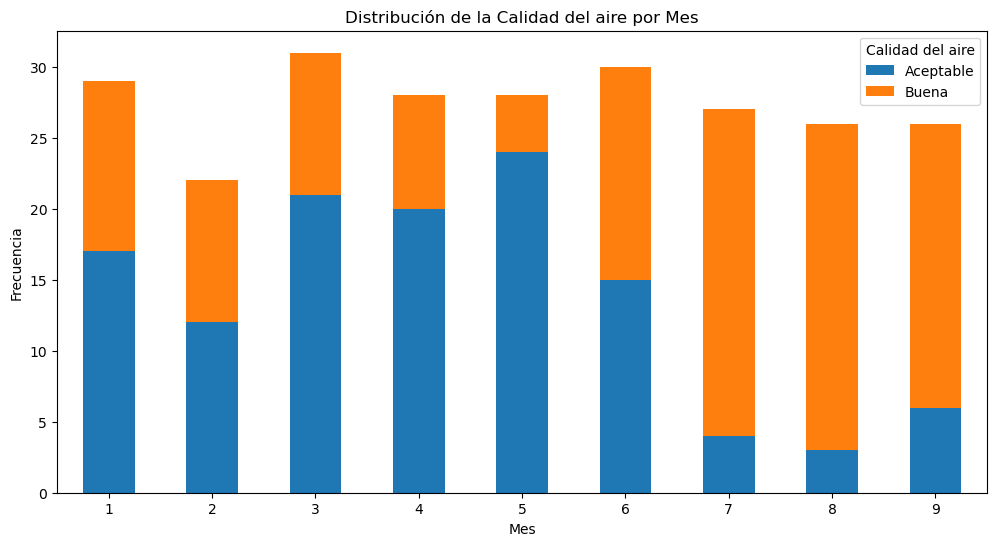

In [366]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna para el mes
data_PM25_CCA['Mes'] = data_PM25_CCA['Fecha_Dia'].dt.month

# Histograma por mes
data_PM25_CCA.groupby('Mes')['Calidad del aire'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))

# Agregar etiquetas y título
plt.title('Distribución de la Calidad del aire por Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.legend(title='Calidad del aire')

# Mostrar el gráfico
plt.xticks(rotation=0)
plt.show()



### Hagamos este proceso PARA TODAS LAS ESTACIONES Y PARTICULAS SUSPENDIDAS

In [386]:
import os
import pickle
import pandas as pd

# Cargar el archivo pickle
path = r'C:\Users\hgera\OneDrive\Escritorio\GITHUB\Air-Quality-Mex\data\data_PowerBI.pkl'
path = path.replace('\\', os.sep)

with open(path, 'rb') as f:
    loaded_data = pickle.load(f)


contaminantes = ['PM2.5', 'PM10']

for contaminante in contaminantes:
    dataPM25 = loaded_data.copy()

    # Filtrar por contaminante
    filtro = dataPM25['Parametro'].str.contains(contaminante, na=False)
    dataPM = dataPM25[filtro].copy()

    # Crear una nueva columna con solo la fecha (sin horas)
    dataPM['Fecha_Dia'] = pd.to_datetime(dataPM['Fecha'].dt.date)

    # Obtener todas las estaciones únicas
    Estaciones = dataPM['Estación'].unique()

    # Crear DataFrames vacíos para cada estación
    estaciones_dfs = {estacion: pd.DataFrame() for estacion in Estaciones}

    for estacion in Estaciones:
        # Filtrar datos de la estación
        data = dataPM[dataPM['Estación'] == estacion].copy()

        if data.empty:
            print(f"⚠️ Advertencia: No hay datos para la estación {estacion}")
            continue  # Saltar a la siguiente estación si no hay datos

        # Filtrar días con al menos 18 horas de datos
        conteo_horas_estacion = data.groupby('Fecha_Dia')['Concentraciones horarias'].apply(lambda x: (x != 0).sum())
        dias_validos = conteo_horas_estacion[conteo_horas_estacion >= 18].index.unique()

        if dias_validos.empty:
            print(f"⚠️ Advertencia: No hay días válidos para la estación {estacion}")
            continue  # Saltar a la siguiente estación si no hay días válidos

        data_validado = data[data['Fecha_Dia'].isin(dias_validos)]

        # Calcular el promedio diario de 'Concentraciones horarias'
        promedios_diarios = data_validado.groupby(['Fecha_Dia', 'Estación', 'Parametro', 'Latitud', 'Longitud'])['Concentraciones horarias'].mean().reset_index()

        if promedios_diarios.empty:
            print(f"⚠️ Advertencia: No hay datos promedio para la estación {estacion}")
            continue  # Saltar si no hay promedios

        # Convertir 'Concentraciones horarias' a enteros
        promedios_diarios['Concentraciones horarias'] = promedios_diarios['Concentraciones horarias'].astype(int)

        # Renombrar la columna a 'Concentración por día'
        promedios_diarios.rename(columns={'Concentraciones horarias': 'Concentración por día'}, inplace=True)

        # ✅ Acumular datos en cada estación usando `pd.concat()`
        estaciones_dfs[estacion] = pd.concat([estaciones_dfs[estacion], promedios_diarios], ignore_index=True)

    # Aplicar las condiciones a **TODOS** los DataFrames dentro del diccionario
    for estacion, df in estaciones_dfs.items():
        if not df.empty:  # Evitar errores si el DataFrame está vacío
            if contaminante == 'PM2.5':
                df.loc[df['Concentración por día'] <= 15, ['id', 'Calidad del aire', 'Riesgo']] = [0, 'Buena', 'Bajo']
                df.loc[(df['Concentración por día'] > 15) & (df['Concentración por día'] < 33), ['id', 'Calidad del aire', 'Riesgo']] = [1, 'Aceptable', 'Moderado']
                df.loc[(df['Concentración por día'] >= 33) & (df['Concentración por día'] < 79), ['id', 'Calidad del aire', 'Riesgo']] = [2, 'Mala', 'Alto']
                df.loc[(df['Concentración por día'] >= 79) & (df['Concentración por día'] < 130), ['id', 'Calidad del aire', 'Riesgo']] = [3, 'Muy mala', 'Muy alto']
                df.loc[df['Concentración por día'] >= 130, ['id', 'Calidad del aire', 'Riesgo']] = [4, 'Extremadamente mala', 'Extremadamente alto']

            elif contaminante == 'PM10':
                df.loc[df['Concentración por día'] <= 45, ['id', 'Calidad del aire', 'Riesgo']] = [0, 'Buena', 'Bajo']
                df.loc[(df['Concentración por día'] > 45) & (df['Concentración por día'] < 60), ['id', 'Calidad del aire', 'Riesgo']] = [1, 'Aceptable', 'Moderado']
                df.loc[(df['Concentración por día'] >= 60) & (df['Concentración por día'] < 132), ['id', 'Calidad del aire', 'Riesgo']] = [2, 'Mala', 'Alto']
                df.loc[(df['Concentración por día'] >= 132) & (df['Concentración por día'] < 213), ['id', 'Calidad del aire', 'Riesgo']] = [3, 'Muy mala', 'Muy alto']
                df.loc[df['Concentración por día'] >= 213, ['id', 'Calidad del aire', 'Riesgo']] = [4, 'Extremadamente mala', 'Extremadamente alto']

    # ✅ Concatenar todos los DataFrames corregidos de todas las estaciones
    data_final = pd.concat(estaciones_dfs.values(), ignore_index=True)

    # ✅ Guardar en un archivo pickle solo si hay datos
    if not data_final.empty:
        file_name = f"data{os.sep}IndiceDeCalidad{os.sep}data_{contaminante}.pkl"
        with open(file_name, 'wb') as f:
            pickle.dump(data_final, f)
        print(f"✅ Objeto {file_name} guardado correctamente")
    else:
        print(f"⚠️ No se guardó el archivo {file_name} porque el DataFrame está vacío.")


✅ Objeto data\IndiceDeCalidad\data_PM2.5.pkl guardado correctamente
✅ Objeto data\IndiceDeCalidad\data_PM10.pkl guardado correctamente


In [389]:
# Cargar el objeto data_clean desde el archivo pickle
with open('data' + os.sep + 'IndicedeCalidad'+os.sep+ 'data_PM2.5.pkl', 'rb') as f:
    data_PM25= pickle.load(f)

print("Objeto cargado correctamente")

# Cargar el objeto data_clean desde el archivo pickle
with open('data' + os.sep + 'IndicedeCalidad'+os.sep+ 'data_PM10.pkl', 'rb') as f:
    data_PM10= pickle.load(f)

print("Objeto cargado correctamente")



Objeto cargado correctamente
Objeto cargado correctamente


In [390]:
data_PM25

,Fecha_Dia,Estación,Parametro,Latitud,Longitud,Concentración por día,id,Calidad del aire,Riesgo
0,2023-01-02,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.1760,8,0.0,Buena,Bajo
1,2023-01-03,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.1760,8,0.0,Buena,Bajo
2,2023-01-04,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.1760,13,0.0,Buena,Bajo
3,2023-01-05,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.1760,16,1.0,Aceptable,Moderado
4,2023-01-06,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.1760,16,1.0,Aceptable,Moderado
...,...,...,...,...,...,...,...,...,...
1288,2024-12-27,"NL, Universidad",PM2.5,25.7216,-100.3124,27,1.0,Aceptable,Moderado
1289,2024-12-28,"NL, Universidad",PM2.5,25.7216,-100.3124,15,0.0,Buena,Bajo
1290,2024-12-29,"NL, Universidad",PM2.5,25.7216,-100.3124,21,1.0,Aceptable,Moderado
1291,2024-12-30,"NL, Universidad",PM2.5,25.7216,-100.3124,21,1.0,Aceptable,Moderado


In [391]:
data_PM10

,Fecha_Dia,Estación,Parametro,Latitud,Longitud,Concentración por día,id,Calidad del aire,Riesgo
0,2023-01-03,"CDMX, UAMI",PM10,19.3273,-99.0821,23,0.0,Buena,Bajo
1,2023-01-04,"CDMX, UAMI",PM10,19.3273,-99.0821,45,0.0,Buena,Bajo
2,2023-01-05,"CDMX, UAMI",PM10,19.3273,-99.0821,48,1.0,Aceptable,Moderado
3,2023-01-06,"CDMX, UAMI",PM10,19.3273,-99.0821,36,0.0,Buena,Bajo
4,2023-01-07,"CDMX, UAMI",PM10,19.3273,-99.0821,51,1.0,Aceptable,Moderado
...,...,...,...,...,...,...,...,...,...
1068,2024-12-27,"NL, Universidad",PM10,25.7216,-100.3124,84,2.0,Mala,Alto
1069,2024-12-28,"NL, Universidad",PM10,25.7216,-100.3124,74,2.0,Mala,Alto
1070,2024-12-29,"NL, Universidad",PM10,25.7216,-100.3124,79,2.0,Mala,Alto
1071,2024-12-30,"NL, Universidad",PM10,25.7216,-100.3124,72,2.0,Mala,Alto


In [393]:
new_data = pd.concat([data_PM25, data_PM10], ignore_index=True)
new_data

,Fecha_Dia,Estación,Parametro,Latitud,Longitud,Concentración por día,id,Calidad del aire,Riesgo
0,2023-01-02,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.1760,8,0.0,Buena,Bajo
1,2023-01-03,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.1760,8,0.0,Buena,Bajo
2,2023-01-04,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.1760,13,0.0,Buena,Bajo
3,2023-01-05,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.1760,16,1.0,Aceptable,Moderado
4,2023-01-06,"CDMX, Centro de Ciencias Atmosféricas",PM2.5,19.3266,-99.1760,16,1.0,Aceptable,Moderado
...,...,...,...,...,...,...,...,...,...
2361,2024-12-27,"NL, Universidad",PM10,25.7216,-100.3124,84,2.0,Mala,Alto
2362,2024-12-28,"NL, Universidad",PM10,25.7216,-100.3124,74,2.0,Mala,Alto
2363,2024-12-29,"NL, Universidad",PM10,25.7216,-100.3124,79,2.0,Mala,Alto
2364,2024-12-30,"NL, Universidad",PM10,25.7216,-100.3124,72,2.0,Mala,Alto


In [394]:

# Guardar el objeto data_clean en un archivo pickle
with open('data' + os.sep + 'IndicedeCalidad'+os.sep+ 'data_PM.pkl', 'wb') as f:
    pickle.dump(new_data, f)
print("Objeto guardado correctamente")

Objeto guardado correctamente
